In [1]:
import numpy as np
from scipy.optimize import curve_fit
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#defining models
def model_linear(x, a, b):
    return a * x + b

def model_exp(x, a, b):
    return b * np.exp(a * x)

In [3]:
#load txt files
time_arr, cs_decay_arr = np.loadtxt("./Radioactive Decay Cs (20sec).txt", skiprows=2, unpack=True)
_, background_arr = np.loadtxt("./Radioactive Background 20min(20secdwell).txt", skiprows=2, unpack=True)

mean_background = np.mean(background_arr)
combined_arr = np.copy(cs_decay_arr)
for i in range(len(combined_arr)):
    combined_arr[i] = combined_arr[i] - mean_background

In [4]:
error_s = np.sqrt(cs_decay_arr + background_arr)

In [5]:
rate_arr = combined_arr / 20
rate_error_arr = np.sqrt(combined_arr) / 20

In [6]:
error_exp = np.abs(error_s / combined_arr)
linear_p_opt, linear_p_cov = curve_fit(model_linear, time_arr * 20, np.log(combined_arr), \
                                       sigma=error_exp, absolute_sigma=True)

In [7]:
none_linear_p_opt, none_linear_p_cov = curve_fit(model_exp, time_arr * 20, combined_arr, \
                                                 (-4.5 * 10**(-3), 1200), error_s, True)

In [8]:
linear_a = linear_p_opt[0]
linear_b = linear_p_opt[1]
none_linear_a = none_linear_p_opt[0]
none_linear_b = none_linear_p_opt[1]

linear_pvar = np.diag(linear_p_cov)
linear_stdev = np.sqrt(linear_pvar)
none_linear_pvar = np.diag(none_linear_p_cov)
none_linear_stdev = np.sqrt(none_linear_pvar)

print("The parameters predicted for the linear model is a =", linear_a, "±", str(linear_stdev[0]) + " /s;", "b =", linear_b, "±", linear_stdev[1], 's')
print("The variance of parameter a is", linear_pvar[0], '/s;', "and of parameter b is", linear_pvar[1], 's', '\n')
print("The parameters predicted for the none linear model is a =", none_linear_a, "±", str(none_linear_stdev[0]) + " /s;", "b =", none_linear_b, "±", none_linear_stdev[1], 's')
print("The variance of parameter a is", none_linear_pvar[0], '/s;', "and of parameter b is", none_linear_pvar[1], 's')

The parameters predicted for the linear model is a = -0.004503503875377196 ± 4.6890915125113546e-05 /s; b = 7.088155064138444 ± 0.01357809066560596 s
The variance of parameter a is 2.1987579212706026e-09 /s; and of parameter b is 0.0001843645461234157 s 

The parameters predicted for the none linear model is a = -0.004571076616262783 ± 4.691751208527998e-05 /s; b = 1207.846477569542 ± 16.34476479378523 s
The variance of parameter a is 2.201252940272393e-09 /s; and of parameter b is 267.15133616416114 s


In [9]:
# Calculate the half life using the two values of a
# a = - 1/half life
half_life_l = np.log(0.5) / linear_a # see report for derivation (inside question 1)
half_life_nl = np.log(0.5) / none_linear_a

delta_tl = np.abs((-0.0045) ** (-2) * 4.69 * 10**(-5)) #see uncertainty propagation in report Question 1
delta_tnl = np.abs((-0.00457) ** (-2) * 4.69 * 10**(-5))

print("The half life calculated from the linear fit model yields t =", half_life_l, '±', delta_tl, "s")
print("The half life calcualted from the none linear fit model yields t =", half_life_nl, '±', delta_tnl, "s")

The half life calculated from the linear fit model yields t = 153.91286423660287 ± 2.3160493827160504 s
The half life calcualted from the none linear fit model yields t = 151.63762035707202 ± 2.245641587941527 s


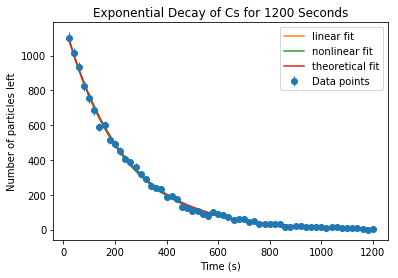

In [10]:
linear_fit_y = model_linear(time_arr * 20, linear_a, linear_b)
none_linear_fit_y = model_exp(time_arr * 20, none_linear_a, none_linear_b)

theoretical_a = np.log(0.5) / (2.6 * 60)
theoretical_b = np.log(combined_arr[0]) - linear_a * time_arr[0] * 20
theoretical_fit_y = model_exp(time_arr * 20, theoretical_a, np.exp(theoretical_b))

plt.errorbar(time_arr * 20, combined_arr, yerr=error_s, ls='', marker='o', lw=1, label="Data points")
plt.plot(time_arr * 20, np.exp(linear_fit_y), label="linear fit")
plt.plot(time_arr * 20, none_linear_fit_y, label="nonlinear fit")
plt.plot(time_arr * 20, theoretical_fit_y, label="theoretical fit")
plt.xlabel("Time (s)")
plt.ylabel("Number of particles left")
plt.title("Exponential Decay of Cs for 1200 Seconds")
plt.savefig('/Users/qinchenwang/Desktop/asdkf.png')
plt.legend()

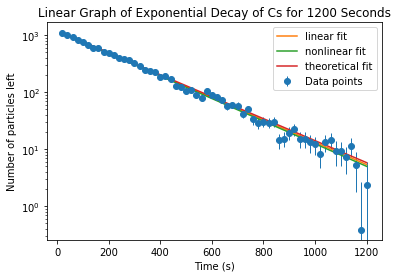

In [11]:
from matplotlib import pylab
linear_fit_y = model_linear(time_arr * 20, linear_a, linear_b)
none_linear_fit_y = model_exp(time_arr * 20, none_linear_a, none_linear_b)

theoretical_a = np.log(0.5) / (2.6 * 60)
theoretical_b = np.log(combined_arr[0]) - linear_a * time_arr[0] * 20
theoretical_fit_y = model_exp(time_arr * 20, theoretical_a, np.exp(theoretical_b))

plt.errorbar(time_arr * 20, combined_arr, yerr=error_s, ls='', marker='o', lw=1, label="Data points")
plt.plot(time_arr * 20, np.exp(linear_fit_y), label="linear fit")
plt.plot(time_arr * 20, none_linear_fit_y, label="nonlinear fit")
plt.plot(time_arr * 20, theoretical_fit_y, label="theoretical fit")
plt.xlabel("Time (s)")
plt.ylabel("Number of particles left")
plt.title("Linear Graph of Exponential Decay of Cs for 1200 Seconds")
pylab.semilogy()
plt.legend()

In [12]:
linear_sigma_half = np.abs(np.log(0.5) * linear_stdev[0] / linear_a**2) #see error propagation in report question 1
nl_sigma_half = np.abs(np.log(0.5) * none_linear_stdev[0] / none_linear_a**2)

In [13]:
print("The linear parameters yield a sigma_half of", linear_sigma_half, "s")
print("The nonlinear parameters yield a sigma_half of", nl_sigma_half, "s")

The linear parameters yield a sigma_half of 1.6025555330464087 s
The nonlinear parameters yield a sigma_half of 1.5564079281398389 s


In [14]:
degrees_of_freedom = 60 - 2

predicted = model_exp(time_arr * 20, none_linear_a, none_linear_b)

chi_squared = (1 / degrees_of_freedom) * sum(((combined_arr[: degrees_of_freedom] - predicted[: degrees_of_freedom])\
                                            / error_s[: degrees_of_freedom])**2)

In [15]:
print("The chi-squared value we obtained is", chi_squared)

The chi-squared value we obtained is 0.7993037330502136
